In [1]:
#Installing Libraries

In [190]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

In [191]:
#Loading all datasets first

In [192]:
df1=pd.read_csv(r"C:\Users\91912\Downloads\Table1.csv",sep=",")
df1.head()
df1['Sno']=df1.index+1
df1.head()

,Bhk_Type,Property_Type,Beds,Bathroom,Address,Landmark,state,City,Sno
0,2,Builder Floors,2,2,"Govindpuram, Ghaziabad, Uttar Pradesh",Builder floor,Uttar Pradesh,Ghaziabad,1
1,4,Houses & Villas,4,4,"Tripunithura, Kochi, Kerala",Two Storeyed Bungalow,Kerala,Kochi,2
2,3,Houses & Villas,3,3,"Avadi, Chennai, Tamil Nadu",NONE,Tamil Nadu,Chennai,3
3,3,Houses & Villas,3,2,"Vyttila, Kochi, Kerala",NONE,Kerala,Kochi,4
4,3,Apartments,3,3,"Airport Road, Zirakpur, Punjab",Prem Aero homes 9915314777,Punjab,Zirakpur,5


In [193]:
df2=pd.read_csv(r"C:\Users\91912\Downloads\Table2.csv",sep=",")
df2['Sno']=df2.index+1
df2.head()

,Carpet_Area,Status,Floors,Price_sqft,Sno
0,576,Ready to Move,4.0,600,1
1,3600,Ready to Move,0.0,3600,2
2,894,Under Construction,NaN,1069,3
3,1000,Ready to Move,1.0,1000,4
4,1250,Ready to Move,2.0,1424,5


In [194]:
df3=pd.read_csv(r"C:\Users\91912\Downloads\Table3.csv",sep=",")
df3['Sno']=df3.index+1
df3.head()

,Furnishing,Facing,Car_Parking,Ownership,Book_amt_Lakhs,Total_Amt_in_rupees,Sno
0,Semi-Furnished,South,NaN,Owner,4,"16,00,000",1
1,Semi-Furnished,East,2.0,Owner,0,"1,60,00,000",2
2,Unfurnished,NONE,NaN,Builder,2,"48,50,000",3
3,Unfurnished,CAPITAL PROPERTIES - (A Property Management Se...,NaN,Dealer,2,"41,00,000",4
4,Semi-Furnished,East,1.0,Owner,3,"63,50,000",5


In [195]:
#Joining all the datasets using 'merge'

In [304]:
df4= pd.merge(df1, df2, on='Sno', how='inner')
df5=pd.merge(df4, df3, on='Sno', how='inner')
df5


,Bhk_Type,Property_Type,Beds,Bathroom,Address,Landmark,state,City,Sno,Carpet_Area,Status,Floors,Price_sqft,Furnishing,Facing,Car_Parking,Ownership,Book_amt_Lakhs,Total_Amt_in_rupees
0,2,Builder Floors,2,2,"Govindpuram, Ghaziabad, Uttar Pradesh",Builder floor,Uttar Pradesh,Ghaziabad,1,576,Ready to Move,4.0,600,Semi-Furnished,South,NaN,Owner,4,"16,00,000"
1,4,Houses & Villas,4,4,"Tripunithura, Kochi, Kerala",Two Storeyed Bungalow,Kerala,Kochi,2,3600,Ready to Move,0.0,3600,Semi-Furnished,East,2.0,Owner,0,"1,60,00,000"
2,3,Houses & Villas,3,3,"Avadi, Chennai, Tamil Nadu",NONE,Tamil Nadu,Chennai,3,894,Under Construction,NaN,1069,Unfurnished,NONE,NaN,Builder,2,"48,50,000"
3,3,Houses & Villas,3,2,"Vyttila, Kochi, Kerala",NONE,Kerala,Kochi,4,1000,Ready to Move,1.0,1000,Unfurnished,CAPITAL PROPERTIES - (A Property Management Se...,NaN,Dealer,2,"41,00,000"
4,3,Apartments,3,3,"Airport Road, Zirakpur, Punjab",Prem Aero homes 9915314777,Punjab,Zirakpur,5,1250,Ready to Move,2.0,1424,Semi-Furnished,East,1.0,Owner,3,"63,50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,Apartments,2,2,"Chrompet, Chennai, Tamil Nadu",NAVRANG FLATS,Tamil Nadu,Chennai,196,900,Under Construction,1.0,1010,Unfurnished,North,1.0,Builder,3,"65,65,000"
196,3,Houses & Villas,3,2,"Ravbahadur Park, Anand, Gujarat",NONE,Gujarat,Anand,197,600,Ready to Move,NaN,1100,Semi-Furnished,NONE,NaN,Owner,0,"37,00,000"
197,1,Apartments,1,1,"Lohegaon, Pune, Maharashtra",NONE,Maharashtra,Pune,198,567,Under Construction,1.0,737,Unfurnished,Shreeram Shivalay,NaN,Builder,5,"53,00,000"
198,2,Apartments,2,2,"Dhanori, Pune, Maharashtra",NONE,Maharashtra,Pune,199,749,Under Construction,1.0,973,Unfurnished,Skyrise Sparkle,NaN,Builder,7,"74,00,000"


In [305]:
#Checking for duplicates and removing if any:
df5.drop_duplicates(inplace=True)

In [306]:
#Checking for nulls
df5.isnull().sum()

Bhk_Type                 0
Property_Type            0
Beds                     0
Bathroom                 0
Address                  0
Landmark                 0
state                    0
City                     2
Sno                      0
Carpet_Area              0
Status                   0
Floors                  42
Price_sqft               0
Furnishing               0
Facing                   0
Car_Parking            107
Ownership                0
Book_amt_Lakhs           0
Total_Amt_in_rupees      0
dtype: int64

In [307]:
# Here , as we see ,there is null values in City,Floors and Car_Parking COlumn
#We have to  treat null in the upcoming steps:

In [308]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
lab=LabelEncoder()

In [309]:
for col in df5.columns:
    df5[col] = lab.fit_transform(df5[col].astype(str))

In [310]:
#Filtering categorical data
object_t=list(df5.select_dtypes(include='object'))
object_t

[]

In [311]:
#Using Encoders to treat non-numerical data of 'Facing', 'Book_amt_Lakhs', 'Total_Amt_in_rupees' column:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df5['Book_amt_Lakhs'] = encoder.fit_transform(df5['Book_amt_Lakhs'])
df5['Total_Amt_in_rupees'] = encoder.fit_transform(df5['Total_Amt_in_rupees'])
df5['Facing'] = encoder.fit_transform(df5['Facing'])
df5['Furnishing'] = encoder.fit_transform(df5['Furnishing'])
df5['Ownership'] = encoder.fit_transform(df5['Ownership'])

In [312]:
#Filtering categorical data
object_t_new=list(df5.select_dtypes(include='object'))
object_t_new

[]

In [313]:
#Again Checking for null
df5.isnull().sum()

Bhk_Type               0
Property_Type          0
Beds                   0
Bathroom               0
Address                0
Landmark               0
state                  0
City                   0
Sno                    0
Carpet_Area            0
Status                 0
Floors                 0
Price_sqft             0
Furnishing             0
Facing                 0
Car_Parking            0
Ownership              0
Book_amt_Lakhs         0
Total_Amt_in_rupees    0
dtype: int64

In [314]:
#Now, all columns are fit with numerical data to proceed further 

In [315]:
#Taking a look on first 5 rows
df5.head()

,Bhk_Type,Property_Type,Beds,Bathroom,Address,Landmark,state,City,Sno,Carpet_Area,Status,Floors,Price_sqft,Furnishing,Facing,Car_Parking,Ownership,Book_amt_Lakhs,Total_Amt_in_rupees
0,1,1,1,1,14,5,10,6,0,19,2,5,23,2,16,3,3,10,5
1,3,2,3,3,34,18,4,9,111,9,2,0,21,2,2,2,3,0,2
2,2,2,2,2,6,9,9,3,123,31,3,8,2,3,6,3,0,6,20
3,2,2,2,1,36,9,4,9,134,0,2,1,0,3,0,3,1,6,18
4,2,0,2,2,2,10,7,25,145,3,2,3,12,2,2,1,3,8,25


In [316]:
df5.describe()

,Bhk_Type,Property_Type,Beds,Bathroom,Address,Landmark,state,City,Sno,Carpet_Area,Status,Floors,Price_sqft,Furnishing,Facing,Car_Parking,Ownership,Book_amt_Lakhs,Total_Amt_in_rupees
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,1.465000,0.745000,1.465000,1.440000,18.490000,9.270000,5.940000,13.565000,99.500000,16.715000,2.27500,3.630000,17.110000,2.140000,7.010000,2.070000,1.180000,7.930000,18.20000
std,1.124767,0.945752,1.124767,1.054495,10.438136,4.058257,2.694942,7.282924,57.879185,10.860642,0.64143,2.800413,10.342278,1.093792,4.591876,1.072779,1.373694,4.166762,10.11293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,0.000000,1.000000,1.000000,10.000000,9.000000,4.000000,7.750000,49.750000,6.750000,2.00000,1.000000,7.750000,2.000000,3.000000,1.000000,0.000000,5.000000,10.00000
50%,2.000000,0.000000,2.000000,1.000000,20.000000,9.000000,6.000000,16.000000,99.500000,17.000000,2.00000,3.000000,18.000000,2.500000,6.000000,3.000000,0.000000,8.000000,20.00000
75%,2.000000,2.000000,2.000000,2.000000,27.000000,9.000000,8.000000,19.000000,149.250000,26.000000,3.00000,6.000000,26.000000,3.000000,9.000000,3.000000,3.000000,11.000000,26.00000
max,5.000000,3.000000,5.000000,5.000000,36.000000,19.000000,12.000000,26.000000,199.000000,36.000000,3.00000,8.000000,34.000000,3.000000,18.000000,3.000000,3.000000,16.000000,36.00000


In [317]:
#Now our dataset seems good and we can proceed to EDA

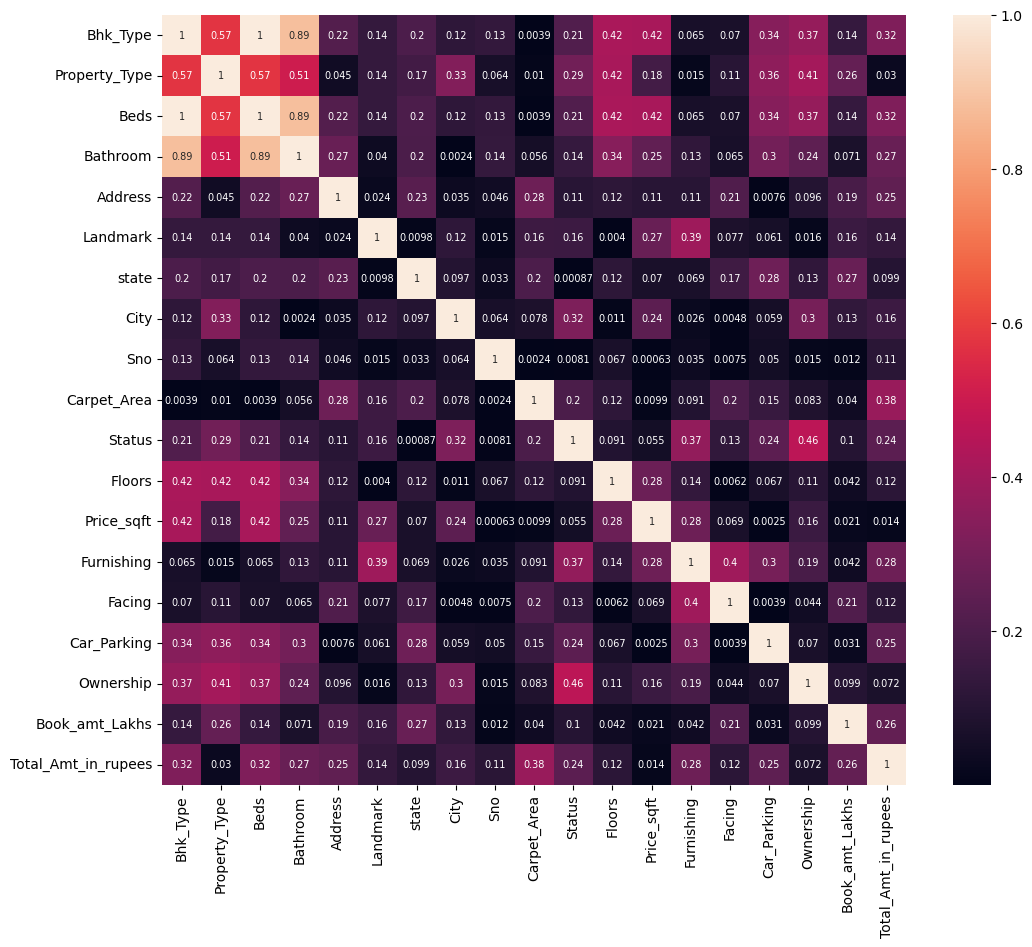

In [318]:
#Plotting a Heatmap
dfheat= df5.corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(dfheat, annot=True, annot_kws={'size':7})
plt.show()

In [319]:
#Observations of above heat map:
#'Bhk_Type' is related with 'Property_Type'
#'Bhk_Type' is highly co-related with 'Beds','Bathroom'
#'Property_Type' is related with 'Address','Beds','Bathroom'
#'Sno' is not densely related to any column, we can remove column-'SNo'  .

In [320]:
#Removing content 'Sno'
df5['Sno']=df5.drop(columns=['Sno'],inplace=True)

<Axes: xlabel='Bhk_Type', ylabel='Property_Type'>

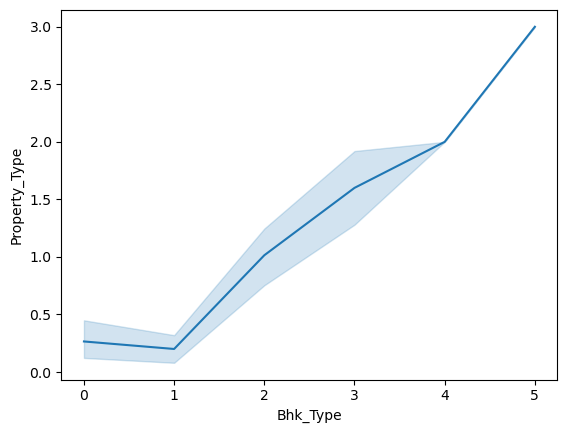

In [321]:
#Relation of 'Bhk_Type' with 'Property_Type'
sns.lineplot(x='Bhk_Type', y='Property_Type',data=df5)

<Axes: xlabel='Bhk_Type', ylabel='Beds'>

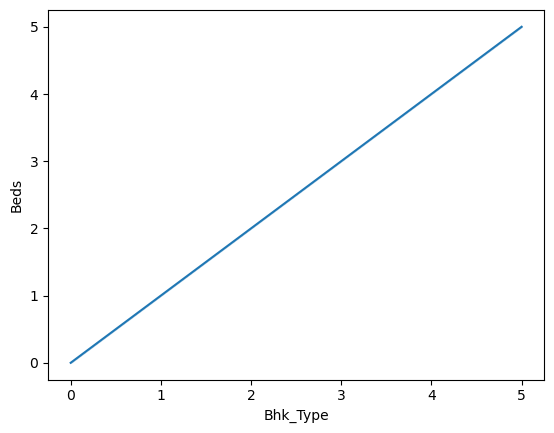

In [322]:
#Relation of 'Bhk_Type' with 'Beds'
sns.lineplot(x='Bhk_Type', y='Beds',data=df5)

<Axes: xlabel='Bhk_Type', ylabel='Bathroom'>

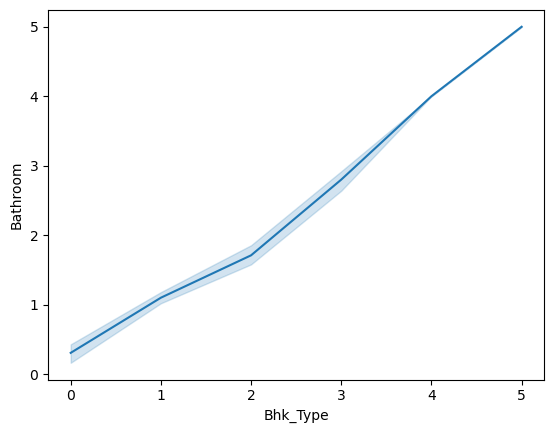

In [323]:
#Relation of 'Bhk_Type' with 'Bathroom'
sns.lineplot(x='Bhk_Type', y='Bathroom',data=df5)

<Axes: xlabel='Address', ylabel='Property_Type'>

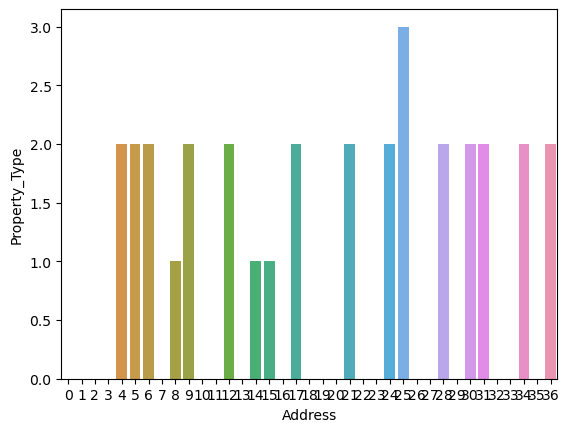

In [324]:
#Relation of 'Address' with 'Property_Type'
sns.barplot(x='Address', y='Property_Type',data=df5)

In [325]:
df5

,Bhk_Type,Property_Type,Beds,Bathroom,Address,Landmark,state,City,Carpet_Area,Status,Floors,Price_sqft,Furnishing,Facing,Car_Parking,Ownership,Book_amt_Lakhs,Total_Amt_in_rupees,Sno
0,1,1,1,1,14,5,10,6,19,2,5,23,2,16,3,3,10,5,None
1,3,2,3,3,34,18,4,9,9,2,0,21,2,2,2,3,0,2,None
2,2,2,2,2,6,9,9,3,31,3,8,2,3,6,3,0,6,20,None
3,2,2,2,1,36,9,4,9,0,2,1,0,3,0,3,1,6,18,None
4,2,0,2,2,2,10,7,25,3,2,3,12,2,2,1,3,8,25,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,1,1,10,8,9,3,32,3,1,1,3,8,1,0,8,27,None
196,2,2,2,1,30,9,2,0,21,2,8,5,2,6,3,3,0,15,None
197,0,0,0,0,22,9,6,19,18,3,1,30,3,14,3,0,11,23,None
198,1,0,1,1,11,9,6,19,27,3,1,33,3,15,3,0,13,29,None


In [326]:
#Let's see maps for outliers

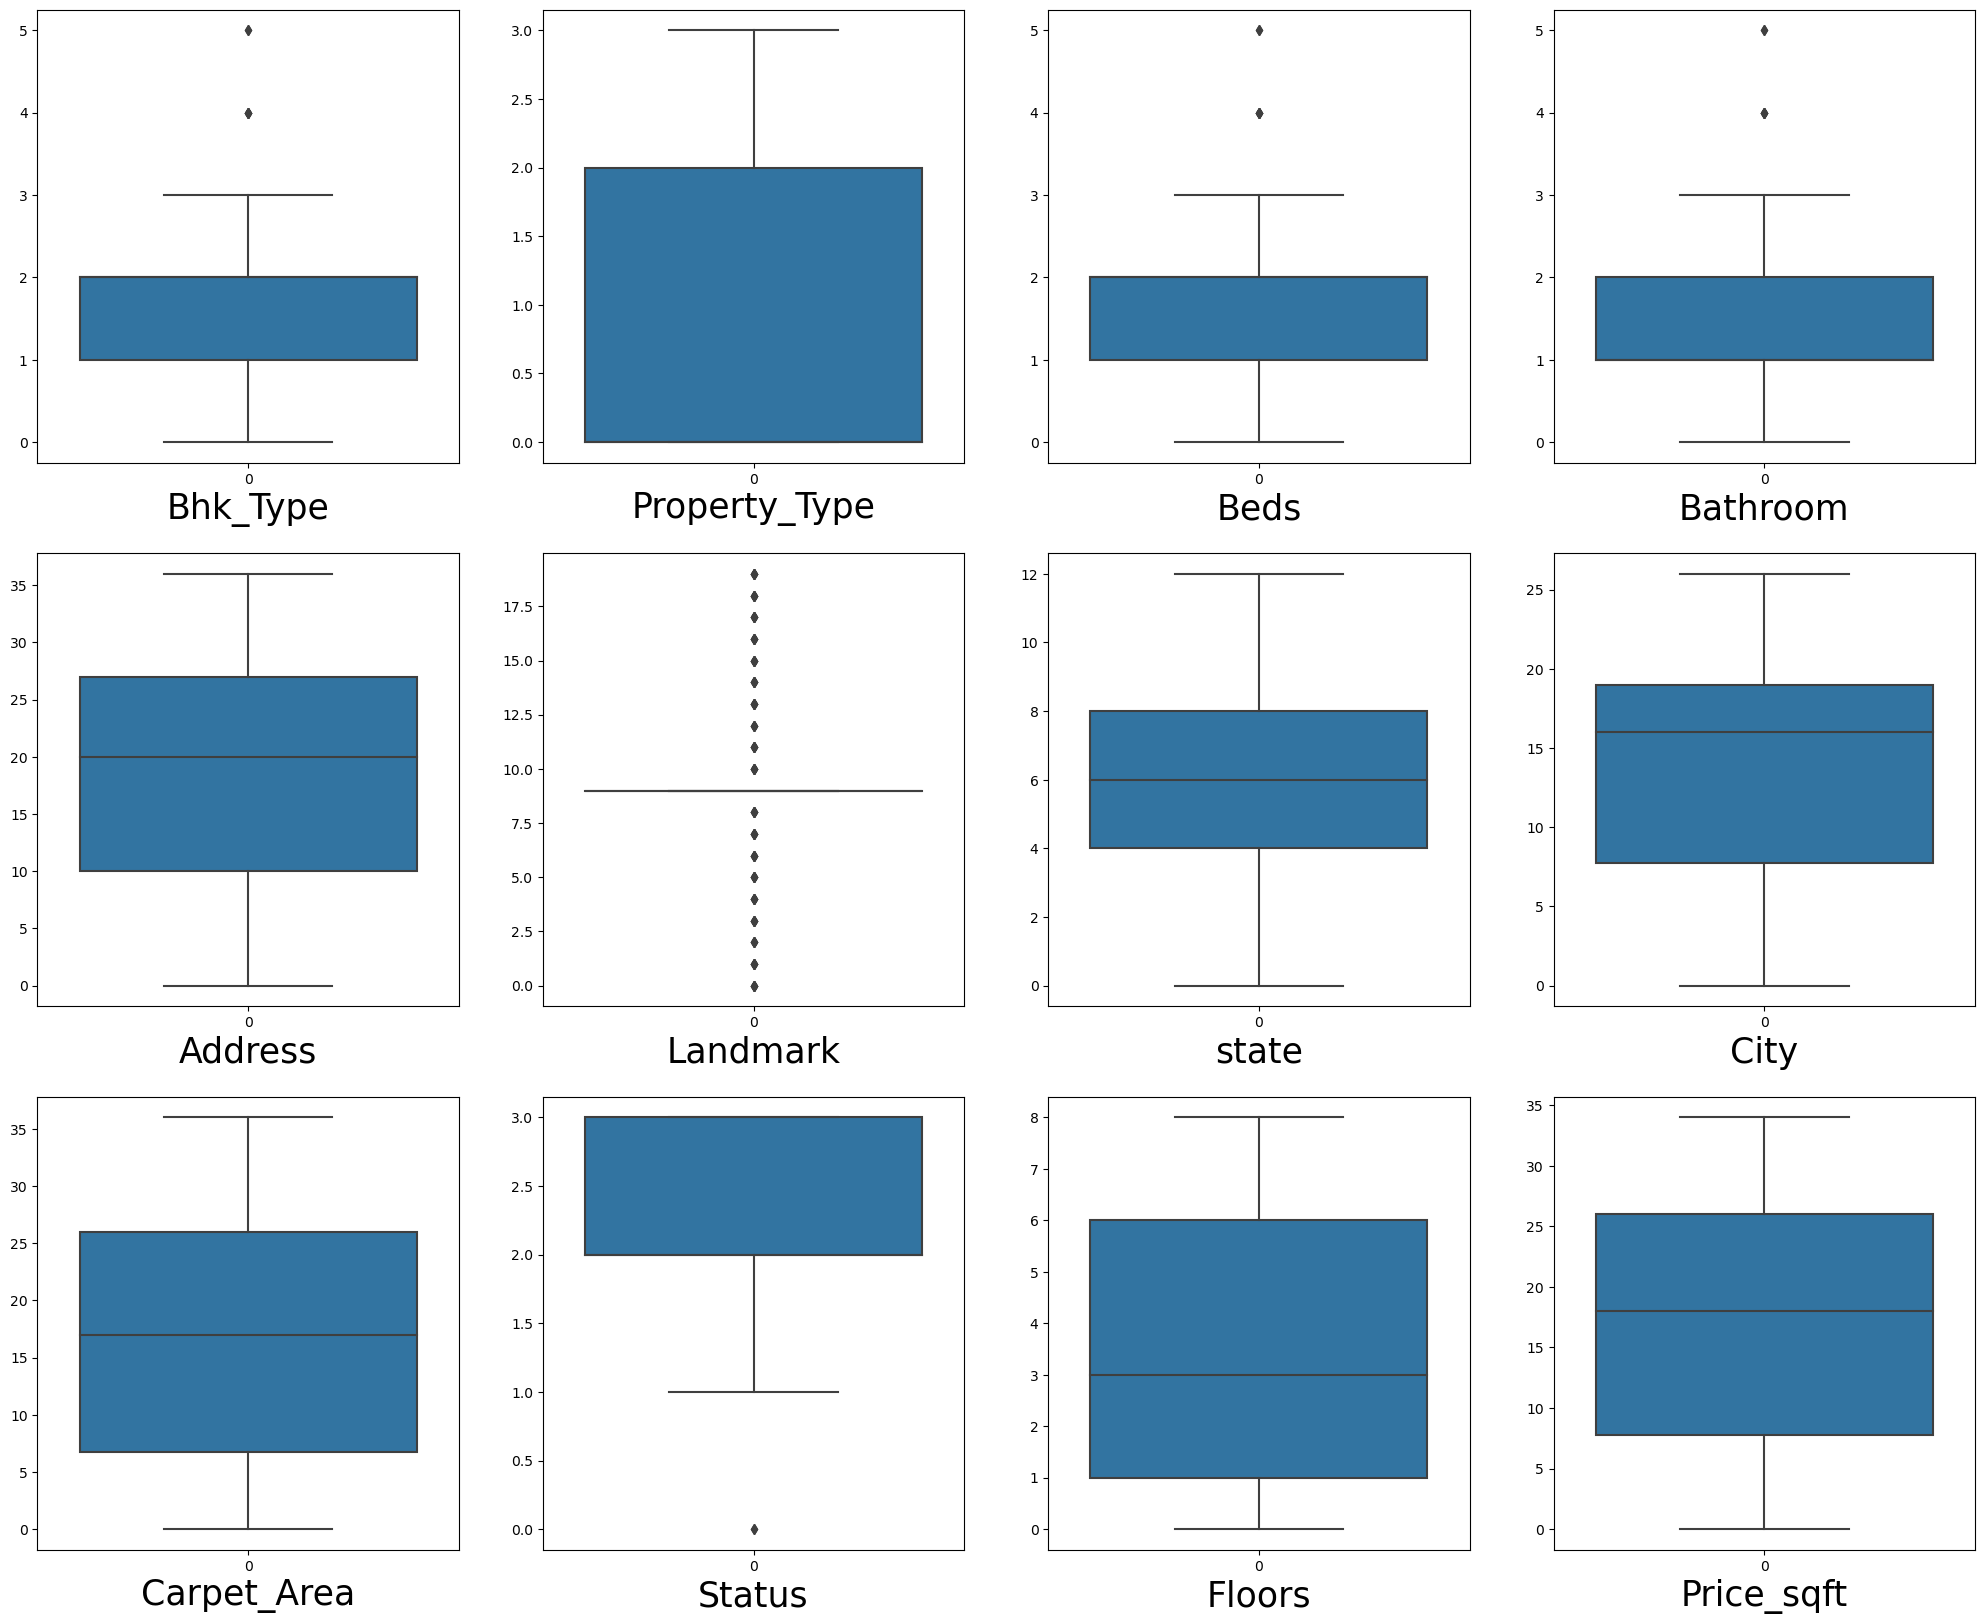

In [327]:
plt.figure(figsize=(25,20))
plot=1

for column in df5:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.boxplot(df5[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [328]:
#Observations:
#Outliers are present in 'Bhk_Type',Beds','Bathroom','Status'
#Outliers is high in 'Landmark'

In [329]:
# Let's remove outlier  using inter quantile range method:
q3=df5.quantile(0.75)
q1=df5.quantile(0.25)
iqr=q3-q1
iqr

Bhk_Type                1.00
Property_Type           2.00
Beds                    1.00
Bathroom                1.00
Address                17.00
Landmark                0.00
state                   4.00
City                   11.25
Carpet_Area            19.25
Status                  1.00
Floors                  5.00
Price_sqft             18.25
Furnishing              1.00
Facing                  6.00
Car_Parking             2.00
Ownership               3.00
Book_amt_Lakhs          6.00
Total_Amt_in_rupees    16.00
dtype: float64

In [ ]:
#Above q3= Third Quantile, Q1= First quantile

In [330]:
#Treating outliers of 'Bhk_Type':
bh= (q3.Bhk_Type + (1.5* iqr.Bhk_Type))
print(bh)
index= np.where(df5['Bhk_Type']> bh)
print(index)
df5= df5.drop(df5.index[index])
df5.reset_index()

3.5
(array([  8,  48,  67,  85,  88, 128, 168], dtype=int64),)


,index,Bhk_Type,Property_Type,Beds,Bathroom,Address,Landmark,state,City,Carpet_Area,Status,Floors,Price_sqft,Furnishing,Facing,Car_Parking,Ownership,Book_amt_Lakhs,Total_Amt_in_rupees,Sno
0,0,1,1,1,1,14,5,10,6,19,2,5,23,2,16,3,3,10,5,None
1,1,3,2,3,3,34,18,4,9,9,2,0,21,2,2,2,3,0,2,None
2,2,2,2,2,2,6,9,9,3,31,3,8,2,3,6,3,0,6,20,None
3,3,2,2,2,1,36,9,4,9,0,2,1,0,3,0,3,1,6,18,None
4,4,2,0,2,2,2,10,7,25,3,2,3,12,2,2,1,3,8,25,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,195,1,0,1,1,10,8,9,3,32,3,1,1,3,8,1,0,8,27,None
189,196,2,2,2,1,30,9,2,0,21,2,8,5,2,6,3,3,0,15,None
190,197,0,0,0,0,22,9,6,19,18,3,1,30,3,14,3,0,11,23,None
191,198,1,0,1,1,11,9,6,19,27,3,1,33,3,15,3,0,13,29,None


In [332]:
df6=df5
df6

,Bhk_Type,Property_Type,Beds,Bathroom,Address,Landmark,state,City,Carpet_Area,Status,Floors,Price_sqft,Furnishing,Facing,Car_Parking,Ownership,Book_amt_Lakhs,Total_Amt_in_rupees,Sno
0,1,1,1,1,14,5,10,6,19,2,5,23,2,16,3,3,10,5,None
1,3,2,3,3,34,18,4,9,9,2,0,21,2,2,2,3,0,2,None
2,2,2,2,2,6,9,9,3,31,3,8,2,3,6,3,0,6,20,None
3,2,2,2,1,36,9,4,9,0,2,1,0,3,0,3,1,6,18,None
4,2,0,2,2,2,10,7,25,3,2,3,12,2,2,1,3,8,25,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,1,1,10,8,9,3,32,3,1,1,3,8,1,0,8,27,None
196,2,2,2,1,30,9,2,0,21,2,8,5,2,6,3,3,0,15,None
197,0,0,0,0,22,9,6,19,18,3,1,30,3,14,3,0,11,23,None
198,1,0,1,1,11,9,6,19,27,3,1,33,3,15,3,0,13,29,None


In [335]:
#Treating outliers of 'Beds', 'Bathroom'
bes= (q3.Beds + (1.5* iqr.Beds))
print(bes)
index= np.where(df5['Beds']> bes)
print(index)
df6= df6.drop(df6.index[index])
df6.reset_index()

be= (q3.Bathroom + (1.5* iqr.Bathroom))
print(be)
index= np.where(df5['Bathroom']> be)
print(index)
df6= df6.drop(df6.index[index])
df6.reset_index()

3.5
(array([], dtype=int64),)
3.5
(array([], dtype=int64),)


,index,Bhk_Type,Property_Type,Beds,Bathroom,Address,Landmark,state,City,Carpet_Area,Status,Floors,Price_sqft,Furnishing,Facing,Car_Parking,Ownership,Book_amt_Lakhs,Total_Amt_in_rupees,Sno
0,0,1,1,1,1,14,5,10,6,19,2,5,23,2,16,3,3,10,5,None
1,1,3,2,3,3,34,18,4,9,9,2,0,21,2,2,2,3,0,2,None
2,2,2,2,2,2,6,9,9,3,31,3,8,2,3,6,3,0,6,20,None
3,3,2,2,2,1,36,9,4,9,0,2,1,0,3,0,3,1,6,18,None
4,4,2,0,2,2,2,10,7,25,3,2,3,12,2,2,1,3,8,25,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,195,1,0,1,1,10,8,9,3,32,3,1,1,3,8,1,0,8,27,None
189,196,2,2,2,1,30,9,2,0,21,2,8,5,2,6,3,3,0,15,None
190,197,0,0,0,0,22,9,6,19,18,3,1,30,3,14,3,0,11,23,None
191,198,1,0,1,1,11,9,6,19,27,3,1,33,3,15,3,0,13,29,None


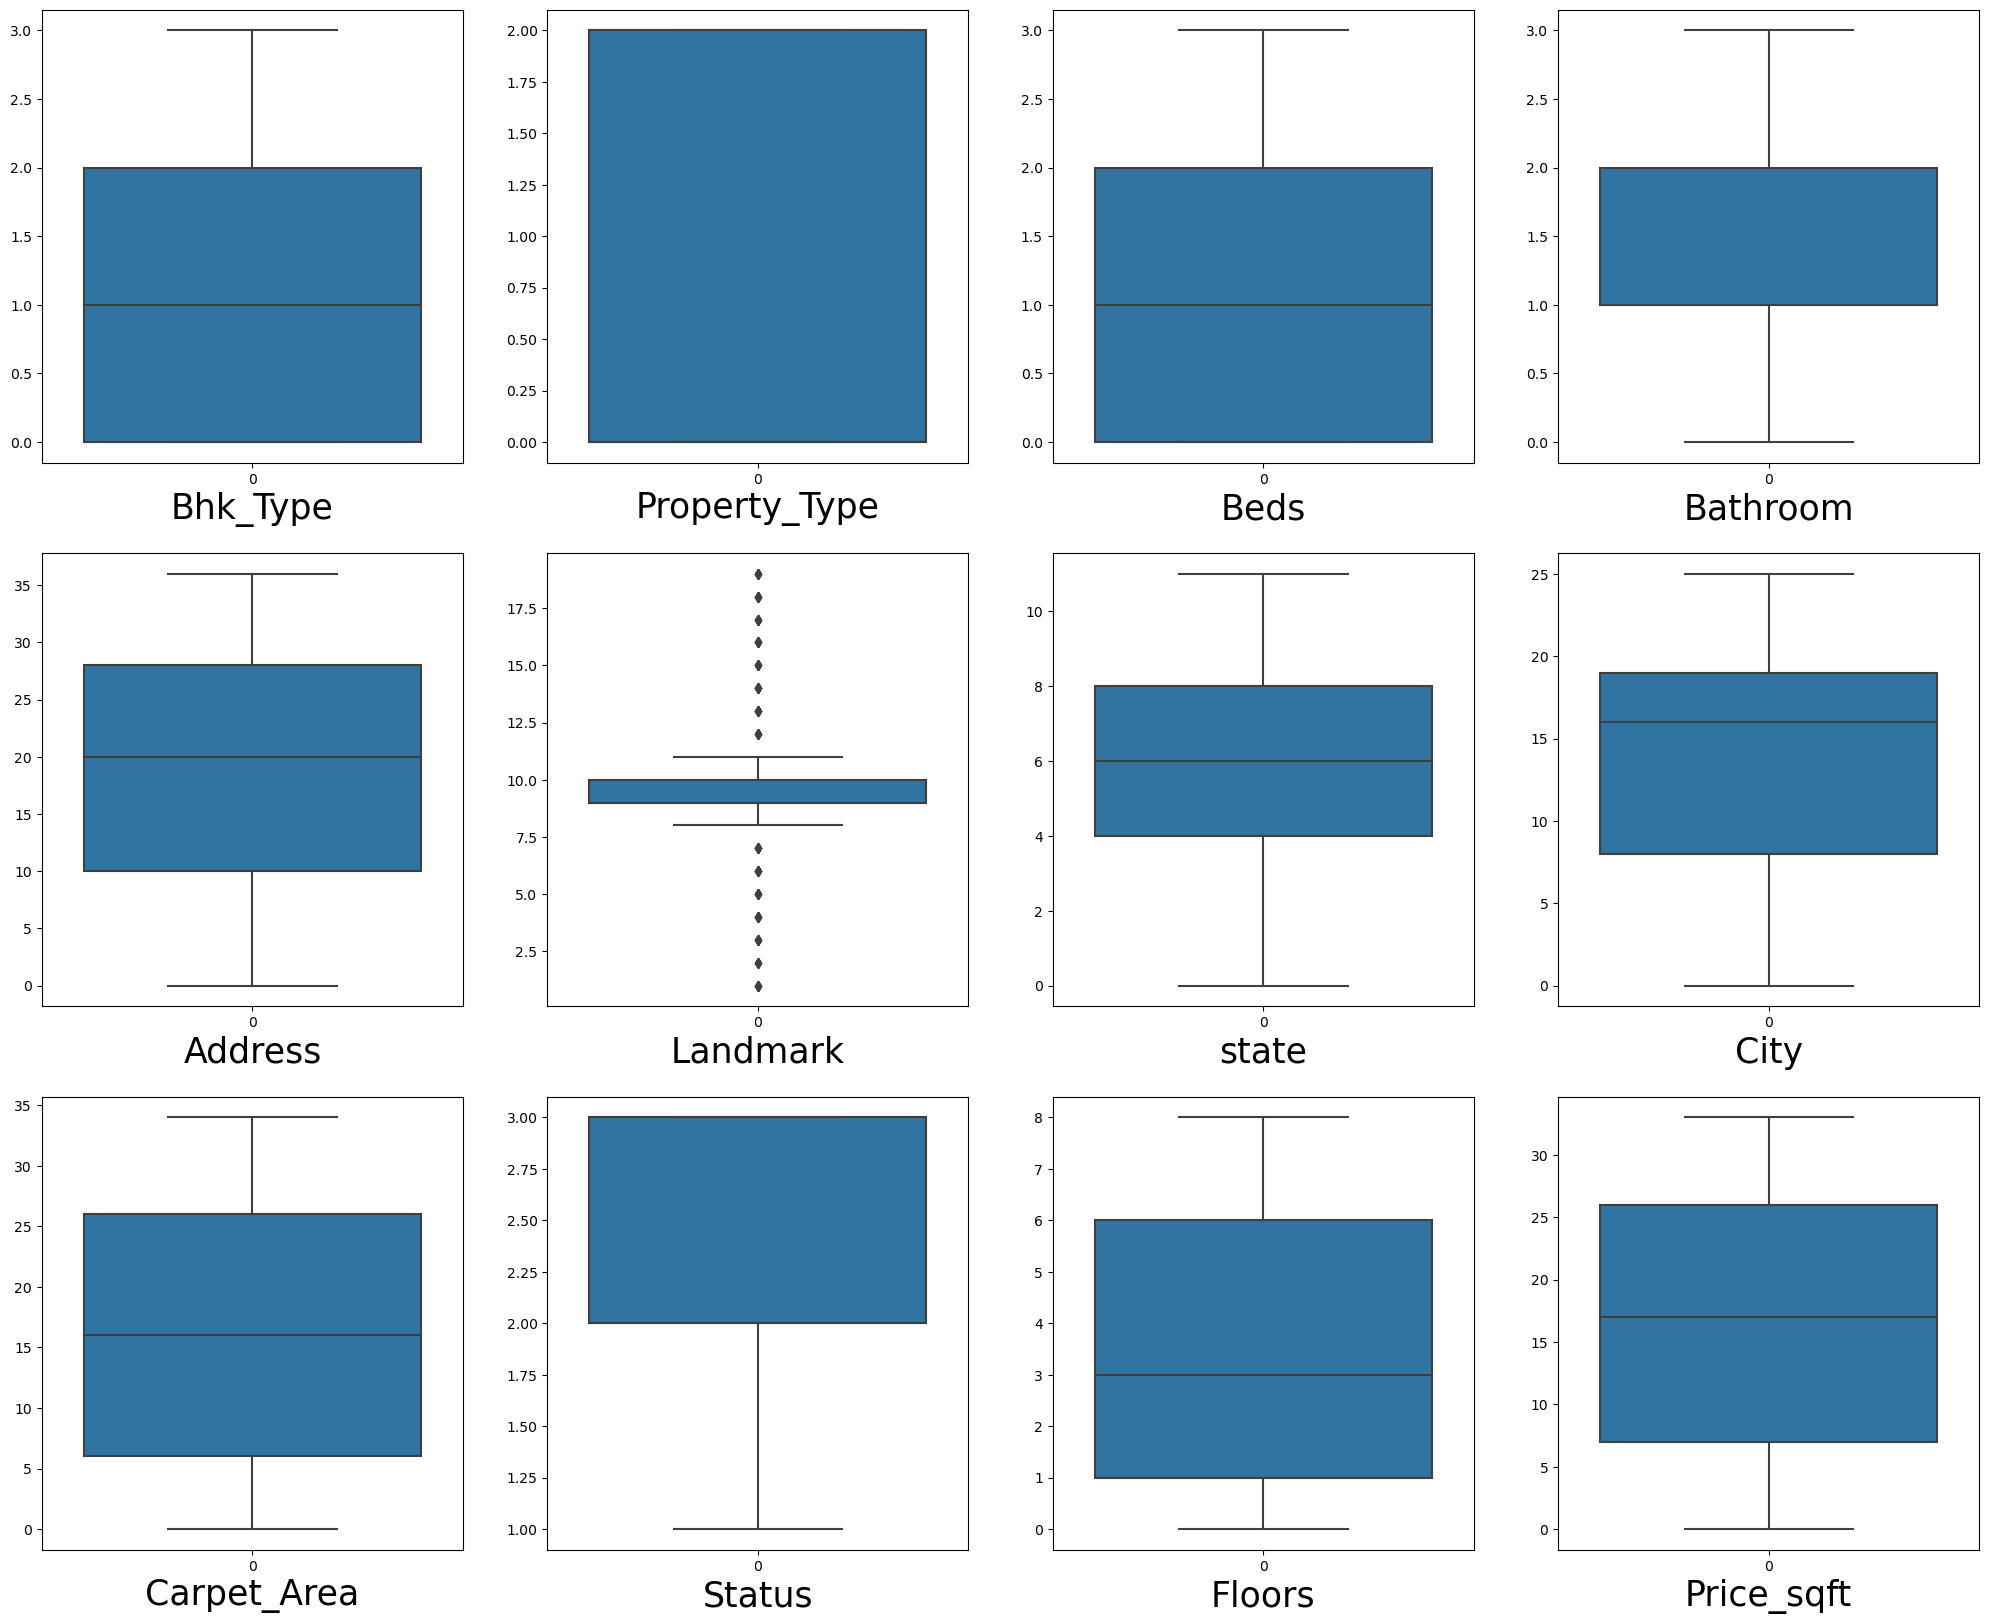

In [336]:
#Again Plotting graph:

plt.figure(figsize=(25,20))
plot=1

for column in df6:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.boxplot(df6[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [346]:
df6['Sno'].fillna(0,inplace=True)
df6['Sno']

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: Sno, Length: 193, dtype: int64

In [347]:
#Now better outcomes

In [348]:
#Let's proceed to Model Building and Predictions:

In [349]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn import metrics


In [350]:
# Model for predictions of buy  total  price:
x1=df6.drop(columns=['Total_Amt_in_rupees'])
y1=df6['Total_Amt_in_rupees']
x1_train, x1_test, y1_train, y1_test= train_test_split(x1,y1, test_size=0.80, random_state=78)

In [351]:
rfmodel=RandomForestRegressor(random_state=30,n_estimators=90)
rfmodel.fit(x1_train,y1_train)


RandomForestRegressor(n_estimators=90, random_state=30)

In [352]:
y1_pred = rfmodel.predict(x1_train.values)
r2= metrics.r2_score(y1_train, y1_pred)

print('R squared value: ',r2)

R squared value:  0.9786033603646227


In [357]:
from sklearn.tree import DecisionTreeRegressor
Dec=DecisionTreeRegressor()
Dec.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [360]:
y2_pred = Dec.predict(x1_train.values)
r3= metrics.r2_score(y1_train, y2_pred)

print('R squared value: ',r3)

R squared value:  1.0


In [362]:
reg = LinearRegression()
reg.fit(x1_train,y1_train)


LinearRegression()

In [363]:
#r2_score for linear regression:
reg.score(x1_train,y1_train)

0.7712994137757836

In [364]:
# Model for predictions of buy  Carpet Area:
x2=df6.drop(columns=['Carpet_Area'])
y2=df6['Carpet_Area']
x2_train, x2_test, y2_train, y2_test= train_test_split(x2,y2, test_size=0.80, random_state=78)

In [365]:
#Random Regression Model
rf2model=RandomForestRegressor(random_state=45,n_estimators=80)
rf2model.fit(x2_train,y2_train)

RandomForestRegressor(n_estimators=80, random_state=45)

In [366]:
rf2model.score(x2_train,y2_train)

0.947563356728754

In [367]:
De=DecisionTreeRegressor()
De.fit(x2_train,y2_train)

DecisionTreeRegressor()

In [369]:
De.score(x2_train,y2_train)

1.0

In [372]:
reg2 = LinearRegression()
reg2.fit(x2_train,y2_train)

LinearRegression()

In [373]:
reg2.score(x2_train,y2_train)

0.6979846045396325

In [374]:
# Model for predictions of buy  Property_Type:
x3=df6.drop(columns=['Property_Type'])
y3=df6['Property_Type']
x3_train, x3_test, y3_train, y3_test= train_test_split(x3,y3, test_size=0.60, random_state=80)

In [387]:
#Definig a function which shows clear Accuracy Score upto two decimal places
def score(model,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=model.predict(x_train)
        print('Train result')
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred=model.predict(x_test)
        print('Test result')
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('report',classification_report(y_test,pred,digits=2))

In [398]:
tree=DecisionTreeClassifier()
tree.fit(x3_train,y3_train) 

DecisionTreeClassifier()

In [399]:
score(tree,x3_train, x3_test, y3_train, y3_test, train=True)
score(tree,x3_train, x3_test, y3_train, y3_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:87.07%
report               precision    recall  f1-score   support

           0       0.87      1.00      0.93        66
           1       0.67      1.00      0.80        10
           2       1.00      0.62      0.77        40

    accuracy                           0.87       116
   macro avg       0.85      0.88      0.83       116
weighted avg       0.90      0.87      0.86       116



In [400]:
random_model=RandomForestClassifier()
random_model.fit(x3_train,y3_train)


RandomForestClassifier()

In [401]:
score(random_model,x3_train, x3_test, y3_train, y3_test, train=True)
score(random_model,x3_train, x3_test, y3_train, y3_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:91.38%
report               precision    recall  f1-score   support

           0       0.87      1.00      0.93        66
           1       1.00      1.00      1.00        10
           2       1.00      0.75      0.86        40

    accuracy                           0.91       116
   macro avg       0.96      0.92      0.93       116
weighted avg       0.93      0.91      0.91       116



In [403]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x3_train,y3_train)
score(knn,x3_train, x3_test, y3_train, y3_test, train=True)
score(knn,x3_train, x3_test, y3_train, y3_test, train=False)

Train result
Accuracy score:83.12%
Test result
Accuracy score:65.52%
report               precision    recall  f1-score   support

           0       0.64      0.89      0.75        66
           1       0.55      0.60      0.57        10
           2       0.85      0.28      0.42        40

    accuracy                           0.66       116
   macro avg       0.68      0.59      0.58       116
weighted avg       0.70      0.66      0.62       116



In [404]:
#Hypertuning of the model

In [406]:
from sklearn.svm import SVC
params = {'n_estimators':[12,15],'criterion':['entropy','gini'],'max_depth':[10,5],'min_samples_split':[10,17],
         'min_samples_leaf':[4,6]}
grd=GridSearchCV(random_model,param_grid=params)
grd.fit(x3_train,y_train)
print('best',grd.best_params_)

best {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 15}


In [409]:
random2_model=grd.best_estimator_
random2_model.fit(x3_train,y3_train)


RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=15)

In [410]:
score(random2_model,x3_train, x3_test, y3_train, y3_test, train=True)
score(random2_model,x3_train, x3_test, y3_train, y3_test, train=False)

Train result
Accuracy score:92.21%
Test result
Accuracy score:84.48%
report               precision    recall  f1-score   support

           0       0.79      1.00      0.88        66
           1       0.00      0.00      0.00        10
           2       1.00      0.80      0.89        40

    accuracy                           0.84       116
   macro avg       0.60      0.60      0.59       116
weighted avg       0.79      0.84      0.81       116



In [ ]:
#Using Gradient booster technique for overfitting

In [412]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gbm_model.fit(x3_train, y3_train)




GradientBoostingClassifier(random_state=42)

In [414]:
score(gbm_model,x3_train, x3_test, y3_train, y3_test, train=True)
score(gbm_model,x3_train, x3_test, y3_train, y3_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:91.38%
report               precision    recall  f1-score   support

           0       0.87      1.00      0.93        66
           1       1.00      1.00      1.00        10
           2       1.00      0.75      0.86        40

    accuracy                           0.91       116
   macro avg       0.96      0.92      0.93       116
weighted avg       0.93      0.91      0.91       116



In [ ]:
#Conclusion/Best method or model:
#Note: We should avoid over fitted model
#SO for Below predictions best model should be:

#buy total price = RandomFOrest Regressor
#Carpet Area= RandomForest Regressor
#Property Type= RandomForest Classifier